## Gaurav Kedia

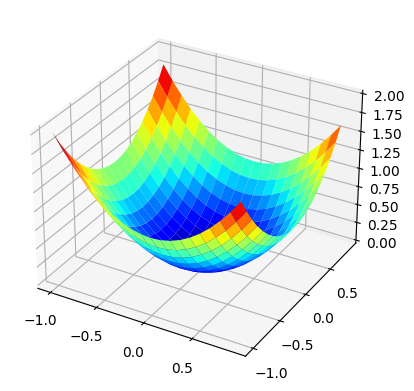

[[2.00000000e+00 1.81000000e+00 1.64000000e+00 1.49000000e+00
  1.36000000e+00 1.25000000e+00 1.16000000e+00 1.09000000e+00
  1.04000000e+00 1.01000000e+00 1.00000000e+00 1.01000000e+00
  1.04000000e+00 1.09000000e+00 1.16000000e+00 1.25000000e+00
  1.36000000e+00 1.49000000e+00 1.64000000e+00 1.81000000e+00]
 [1.81000000e+00 1.62000000e+00 1.45000000e+00 1.30000000e+00
  1.17000000e+00 1.06000000e+00 9.70000000e-01 9.00000000e-01
  8.50000000e-01 8.20000000e-01 8.10000000e-01 8.20000000e-01
  8.50000000e-01 9.00000000e-01 9.70000000e-01 1.06000000e+00
  1.17000000e+00 1.30000000e+00 1.45000000e+00 1.62000000e+00]
 [1.64000000e+00 1.45000000e+00 1.28000000e+00 1.13000000e+00
  1.00000000e+00 8.90000000e-01 8.00000000e-01 7.30000000e-01
  6.80000000e-01 6.50000000e-01 6.40000000e-01 6.50000000e-01
  6.80000000e-01 7.30000000e-01 8.00000000e-01 8.90000000e-01
  1.00000000e+00 1.13000000e+00 1.28000000e+00 1.45000000e+00]
 [1.49000000e+00 1.30000000e+00 1.13000000e+00 9.80000000e-01
  8.5

In [12]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# objective function
def objective(x, y):
     return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
axis = figure.add_subplot(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()
# print(np.shape(xaxis))
print(results)
# print(xaxis)
# print(y)

[-0.96595599  0.54064899]
>0 f([-0.86595599  0.44064899]) = 0.94405
>1 f([-0.79920463  0.37747134]) = 0.78121
>2 f([-0.74675325  0.32987503]) = 0.66646
>3 f([-0.70274519  0.29147005]) = 0.57881
>4 f([-0.66448221  0.25933601]) = 0.50879
>5 f([-0.63046077  0.23184622]) = 0.45123
>6 f([-0.59974197  0.20798051]) = 0.40295
>7 f([-0.57169298  0.18704587]) = 0.36182
>8 f([-0.54586313  0.16854351]) = 0.32637
>9 f([-0.5219178   0.15209838]) = 0.29553
>10 f([-0.49960032  0.1374186 ]) = 0.26848
>11 f([-0.47870856  0.12427078]) = 0.24461
>12 f([-0.45907986  0.11246407]) = 0.22340
>13 f([-0.44058089  0.10183956]) = 0.20448
>14 f([-0.42310069  0.09226298]) = 0.18753
>15 f([-0.40654566  0.08361941]) = 0.17227
>16 f([-0.39083591  0.07580953]) = 0.15850
>17 f([-0.37590256  0.06874675]) = 0.14603
>18 f([-0.36168569  0.06235508]) = 0.13470
>19 f([-0.34813273  0.05656739]) = 0.12440
>20 f([-0.33519721  0.05132412]) = 0.11499
>21 f([-0.32283784  0.04657222]) = 0.10639
>22 f([-0.31101762  0.04226429]) = 0.0

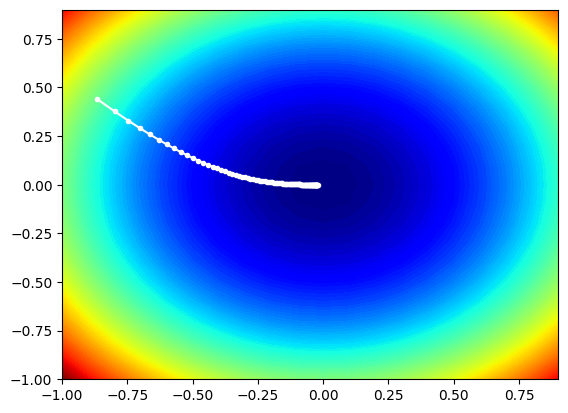

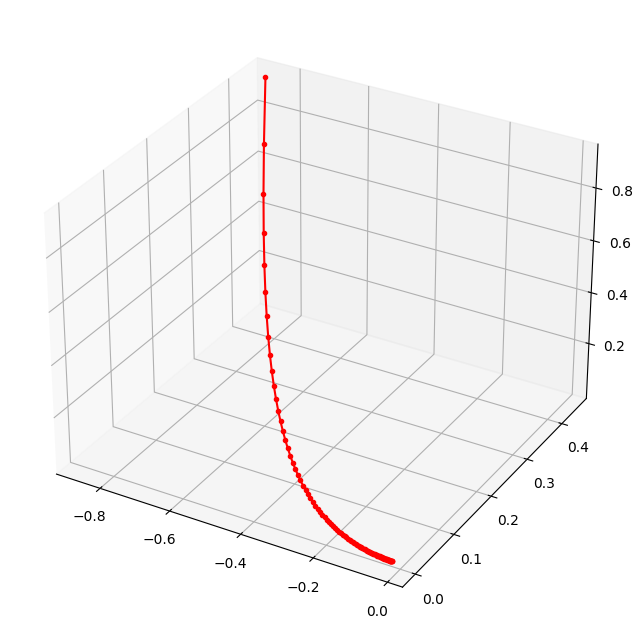

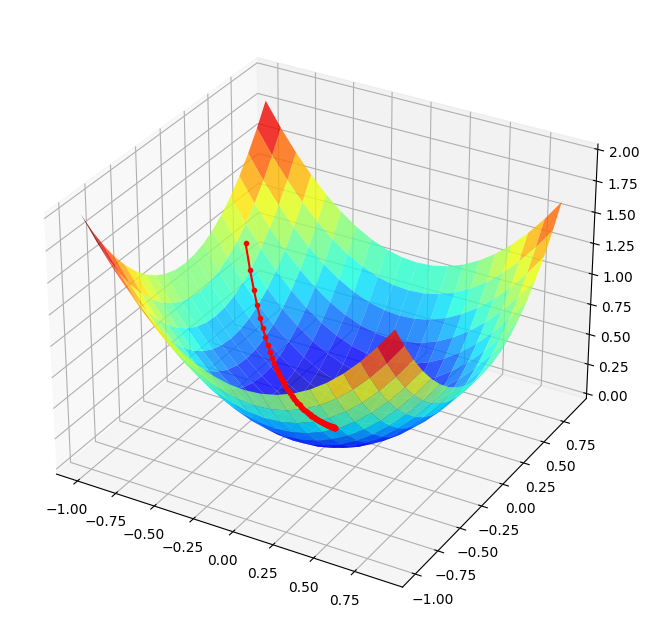

In [6]:
# gradient descent optimization with adagrad for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])


# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
    solutions = list()
    score=list()
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    solution=np.array( [-0.96595599, 0.54064899])
    print(solution)
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    for it in range(n_iter):
        gradient = derivative(solution[0], solution[1])
        for i in range(gradient.shape[0]):
            sq_grad_sums[i] += gradient[i]**2.0
        new_solution = list()
        for i in range(solution.shape[0]):
            alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
            value = solution[i] - alpha * gradient[i]
            new_solution.append(value)
        solution = asarray(new_solution)
        solutions.append(solution)
        solution_eval = objective(solution[0], solution[1])
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
        score.append(solution_eval)
    return [solutions, score]

seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 100
step_size = 0.1
solution, score = adagrad(objective, derivative, bounds, n_iter, step_size)
# print('Done!')
# print('f(%s) = f(%s)' % (solution, score))

xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)



x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)


pyplot.contourf(x, y, results, levels=100, cmap='jet')
solutions = asarray(solution)
# print(solutions[:, 0])
# print(solutions[:, 1])
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.show()



# print(score)
figure =  pyplot.figure(figsize=(10, 8))
axis = figure.add_subplot(projection='3d')
# axis.plot_surface(x, y, results, cmap='jet')
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1],score, '.-', color='r')
pyplot.show()



figure =  pyplot.figure(figsize=(10, 8))
axis = figure.add_subplot(projection='3d')
axis.plot_surface(x, y, results, cmap='jet', alpha=0.8)
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1],score, '.-', color='r', zorder=10)
pyplot.show()